<a href="https://colab.research.google.com/github/TanmayN22/Machine_learning_freeCodeCamp/blob/main/Magic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
cols = ["fLenght", "fWidth", "fSize", "fConc", "fConcl", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

,fLenght,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [ ]:
#since our computer cant understand letters well but understands numbers well we convert this g and h to 0 and 1

In [ ]:
df["class"] = (df["class"] == "g").astype(int)

In [ ]:
df.head()

,fLenght,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


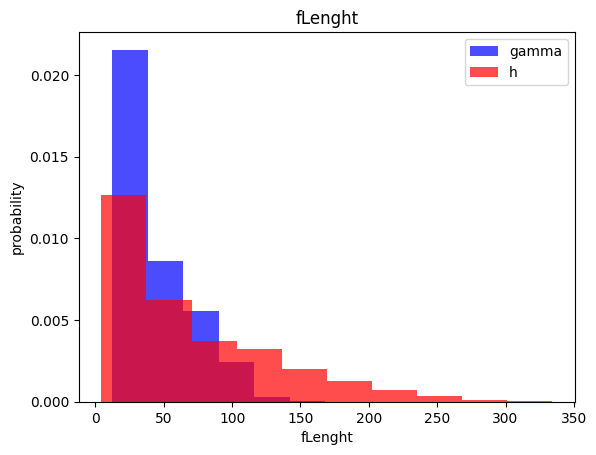

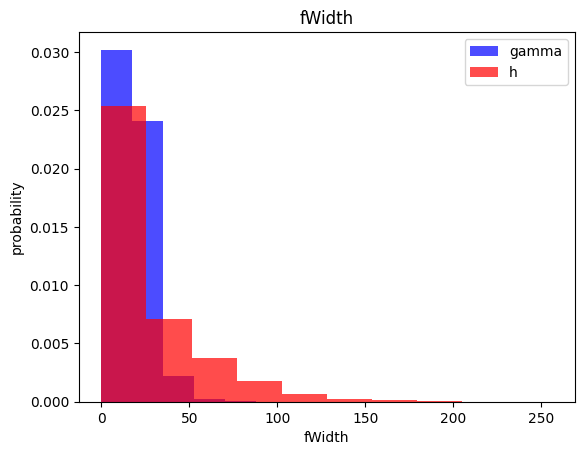

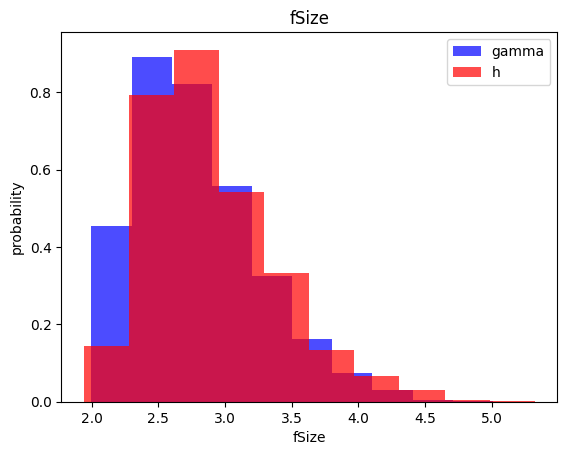

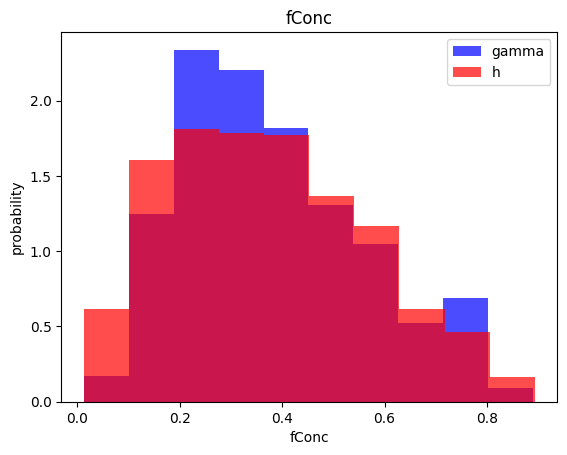

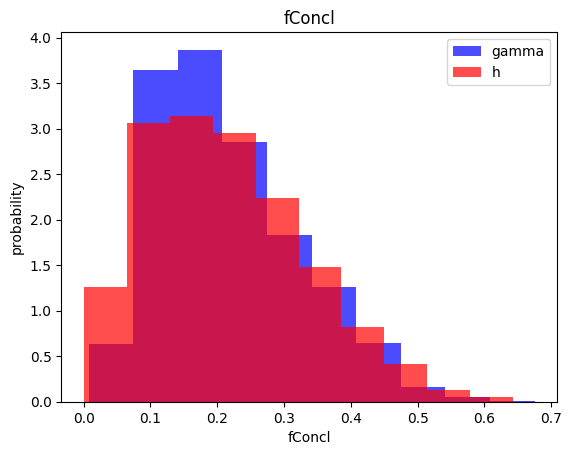

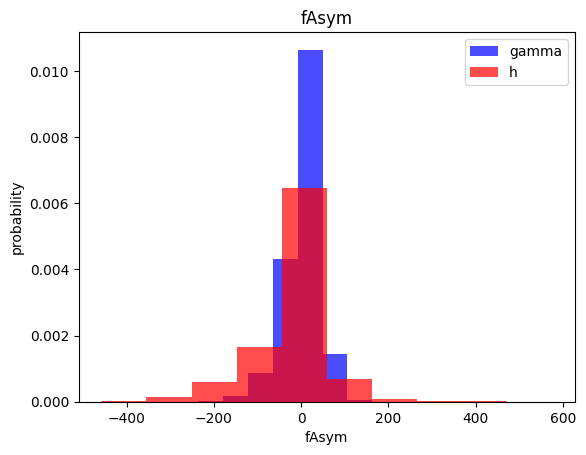

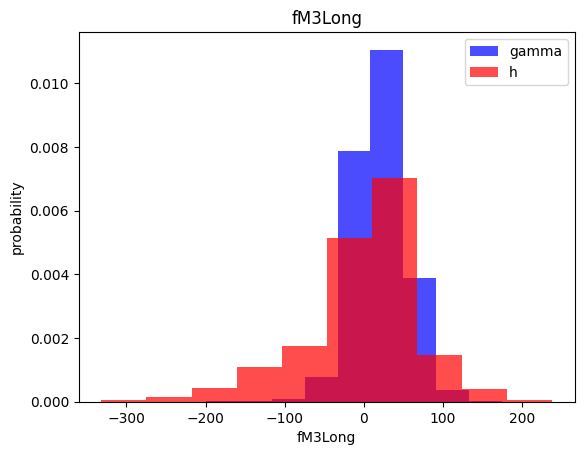

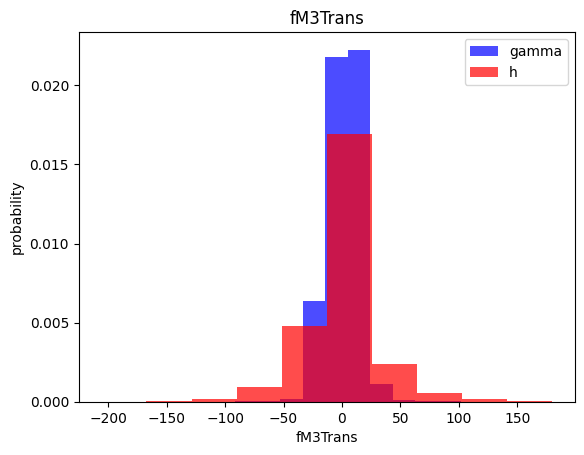

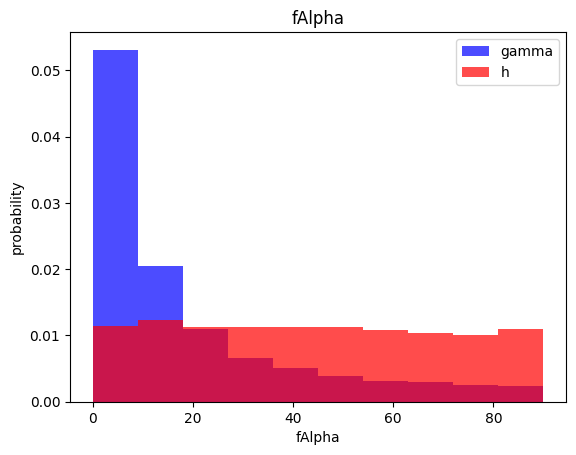

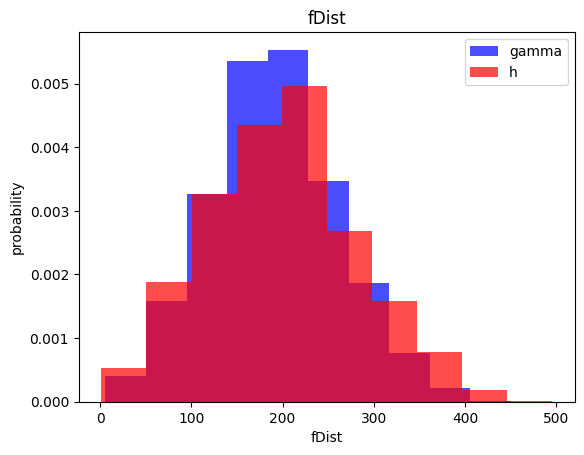

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df["class"]== 1][label], color='blue', label='gamma', alpha =0.7, density= True)
  plt.hist(df[df["class"]== 0][label], color='red', label='hadron', alpha =0.7, density= True)
  plt.title(label)
  plt.ylabel("probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

#train , validate and test dataset

In [ ]:
train , valid , test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
def scale_dataset(dataframe, oversample=False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    x, y = ros.fit_resample(x, y)

  data = np.hstack((x,np.reshape(y,(-1,1))))

  return data, x, y

In [ ]:
train

,fLenght,fWidth,fSize,fConc,fConcl,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
609,56.5206,25.5338,3.3015,0.1728,0.0872,37.5944,32.8930,-17.3517,2.3790,234.5120,1
2033,18.5095,11.5116,2.3674,0.6867,0.4185,12.2497,18.7466,-8.7502,58.5288,146.6600,1
9405,89.7222,23.8906,3.5741,0.1554,0.0806,48.2377,85.2610,15.4428,2.7590,235.4620,1
9109,33.1412,18.2692,2.8695,0.2876,0.1641,22.1164,20.5810,12.7008,11.8560,143.4700,1
8514,73.2948,42.3194,3.6665,0.1981,0.1006,65.1645,68.5967,45.3624,8.6810,234.3990,1
...,...,...,...,...,...,...,...,...,...,...,...
16270,32.2737,13.8695,2.6782,0.4554,0.2719,-20.5075,-13.1159,-12.7632,16.5691,197.2940,0
15244,113.6923,26.5992,3.1136,0.3055,0.1502,-155.9986,65.6331,-17.7282,1.7329,377.0728,0
12892,180.1275,89.0307,3.8010,0.1332,0.0842,-149.5416,128.2536,-77.0535,84.8175,347.4191,0
17586,21.4311,6.9151,2.5105,0.8056,0.6065,10.0764,21.9340,8.6743,38.9470,172.0580,0


In [ ]:
len(train[train["class"] == 1])

7416

In [ ]:
len(train[train["class"] == 0])

3996

In [ ]:
len(y_train)

14832

In [ ]:
len(x_train)

14832

In [ ]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test,  y_test = scale_dataset(test, oversample=False)